In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names

In [ ]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
data.shape

(442, 10)

In [ ]:
from sklearn.linear_model import LinearRegression
sim_lr=LinearRegression() #simple linear regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=2023)

In [ ]:
# 혈당 수치
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train) # series 객체여서 values를 통해 값을 가져옴

LinearRegression()

In [ ]:
y_pred=sim_lr.predict(X_test['s6'].values.reshape((-1,1))) # simple linear regression에서는 하나짜리 배열이다 라고 잘 알아서ㅎ사ㅣ부리닙니다~

In [ ]:
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.2f}'.format(r2_score(y_test,y_pred))) # 연관성이 낮음
print('단순 선형 회귀 계수(w) : {:.2f}, 절편(b) : {:.2f}'.format(sim_lr.coef_[0],sim_lr.intercept_))

단순 선형 회귀, R2: 0.16
단순 선형 회귀 계수(w) : 586.70, 절편(b) : 152.60


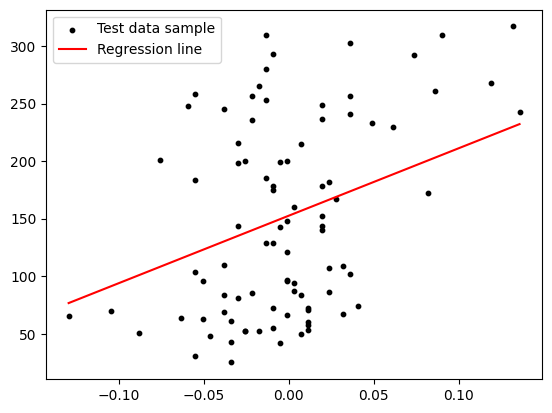

In [ ]:
#linear line의 생성
line_x = np.linspace(np.min(X_test['s6']),np.max(X_test['s6']),10)
line_y = sim_lr.predict(line_x.reshape(-1,1)) 



#Test data를 표현
plt.scatter(X_test['s6'],y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red')
plt.legend(['Test data sample','Regression line'])

In [ ]:
# Multiple Linear Regression
mul_lr = LinearRegression()
mul_lr.fit(X_train,y_train)
y_pred = mul_lr.predict(X_test)

In [ ]:
print('다중 선형 회귀, R2 : {:.2f}'.format(r2_score(y_test,y_pred)))

다중 선형 회귀, R2 : 0.50


In [ ]:
# Decision Tree regressor (Algorithm을 하나의 객체로 보게 됨)
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [ ]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_pred=dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [ ]:
print('단순 결정 트리 회귀, R2 : {:.2}'.format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀, R2 : 0.14


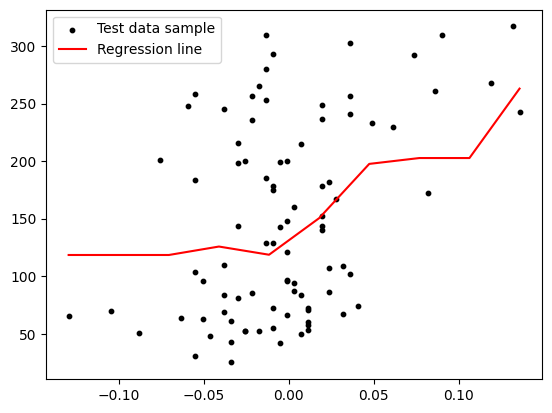

In [ ]:
#linear line의 생성
line_x = np.linspace(np.min(X_test['s6']),np.max(X_test['s6']),10)
line_y = dt_regr.predict(line_x.reshape(-1,1)) 

#Test data를 표현
plt.scatter(X_test['s6'],y_test,s=10,c='black')
plt.plot(line_x,line_y,c='red')
plt.legend(['Test data sample','Regression line'])

In [ ]:
#주말에 데이터 모아서 예측해보기

#다중회귀
mt_regre = DecisionTreeRegressor(max_depth=3)
mt_regre.fit(X_train,y_train)
y_pred = mt_regre.predict(X_test)
print('다중 결정 트리 회귀, r2 : {:.2f} '.format(r2_score(y_test,y_pred)))

다중 결정 트리 회귀, r2 : 0.35 


In [ ]:
# Support Vector Machine Regressor
from sklearn.svm import SVR #classification:SVC, regression : svr
svm_regre = SVR()
svm_regre.fit(X_train['s6'].values.reshape((-1,1)),y_train)
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))
print('단순 서포트 벡터 머신 회귀, r2 : {:.2f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀, r2 : 0.06


In [ ]:
svm_regr =SVR() 
svm_regr.fit(X_train,y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, r2 :{:.2f}'.format(r2_score(y_test,y_pred)))

다중 서포트 벡터 머신 회귀, r2 :0.17


In [ ]:
for i  in range(1,19):
  m_regr  = SVR(C=i)
  m_regr.fit(X_train,y_train)
  y_pred = m_regr.predict(X_test)
  print('다중 서포트 벡터 머신 회귀, i={} r2 :{:.2f}'.format(i, r2_score(y_test,y_pred)))

다중 서포트 벡터 머신 회귀, i=1 r2 :0.17
다중 서포트 벡터 머신 회귀, i=2 r2 :0.29
다중 서포트 벡터 머신 회귀, i=3 r2 :0.35
다중 서포트 벡터 머신 회귀, i=4 r2 :0.39
다중 서포트 벡터 머신 회귀, i=5 r2 :0.42
다중 서포트 벡터 머신 회귀, i=6 r2 :0.44
다중 서포트 벡터 머신 회귀, i=7 r2 :0.46
다중 서포트 벡터 머신 회귀, i=8 r2 :0.47
다중 서포트 벡터 머신 회귀, i=9 r2 :0.48
다중 서포트 벡터 머신 회귀, i=10 r2 :0.49
다중 서포트 벡터 머신 회귀, i=11 r2 :0.49
다중 서포트 벡터 머신 회귀, i=12 r2 :0.50
다중 서포트 벡터 머신 회귀, i=13 r2 :0.50
다중 서포트 벡터 머신 회귀, i=14 r2 :0.50
다중 서포트 벡터 머신 회귀, i=15 r2 :0.50
다중 서포트 벡터 머신 회귀, i=16 r2 :0.50
다중 서포트 벡터 머신 회귀, i=17 r2 :0.50
다중 서포트 벡터 머신 회귀, i=18 r2 :0.50


In [ ]:
# Multi Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=500,max_iter=2000)
mlp_regr.fit(X_train,y_train)
y_pred=mlp_regr.predict(X_test)
print('MLP 회귀, R2 : {:.2f}'.format(r2_score(y_test,y_pred)))

MLP 회귀, R2 : 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
